# INTRODUCTION ;



In this project, we aim to provide actionable insights for a business stakeholder looking to mitigate risks in a new business venture. By leveraging skills in data cleaning, imputation, analysis, and visualization, we will generate data-driven insights to guide decision-making in the aviation industry. The goal is to determine which aircraft present the lowest risk for purchase and operation, thereby supporting the company's strategic diversification efforts.


## BUSINESS PROBLEM ;

As part of its diversification strategy, the company is exploring new industries to expand its portfolio. Currently, the focus is on entering the aviation industry, specifically in purchasing and operating aircraft for both commercial and private enterprises. The critical business problem is to identify the aircraft that pose the lowest risk, enabling the company to make informed decisions in this new market segment.

## BUSINESS UNDERSTANDING

### Main Objective


 
Which aircraft present the lowest risk for purchase and operation, thereby supporting the company's strategic diversification efforts?


### Specific Objectives

 1. Which Aircraft is less vulnerable to accidents?
 2. Which Aircraft to be used for commercial enterprise and which to be used for private enterprises?


# DATA UNDERSTANDING:

In this project we shall work with a dataset from Kaggle obtained by the National Transportation Safety Board, which contains Aviation accident data from 1962 -2023.

## Data & Libraries Importation


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import datetime

### Loading the data

To import the dataset from the CSV file and store it in a variable df

In [2]:
df = pd.read_csv('C:/Users/ADMIN/Documents/Moringa/Phase1/Project1/First-Project/Aviation Data/AviationData.csv', encoding='ISO-8859-1', low_memory=False)
df.head()



,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
df_code = pd.read_csv('Aviation Data/USState_Codes.csv')
df_code.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


 # 1. Data Wrangling

In [4]:
#Checking duplicated values
df.duplicated().value_counts()

False    88889
Name: count, dtype: int64

In [5]:
df.shape

(88889, 31)

The dataset has 88,889 records and 31 columns.

In [6]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

# 2 . DATA CLEANING

In [7]:
#dropping of unnecessary columns for our analysis
df.drop(labels = ['Investigation.Type','Accident.Number','Latitude', 'Longitude', 'Airport.Code',
                  'Airport.Name', 'Amateur.Built','FAR.Description','Air.carrier', 'Publication.Date','Report.Status',
                  'Schedule',],inplace = True , axis = 1)

In [8]:
#CONFIRMING OF DROPPED COLUMNS
df.columns

Index(['Event.Id', 'Event.Date', 'Location', 'Country', 'Injury.Severity',
       'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make',
       'Model', 'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight'],
      dtype='object')

In [9]:
#Checking the general overview of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Location                88837 non-null  object 
 3   Country                 88663 non-null  object 
 4   Injury.Severity         87889 non-null  object 
 5   Aircraft.damage         85695 non-null  object 
 6   Aircraft.Category       32287 non-null  object 
 7   Registration.Number     87507 non-null  object 
 8   Make                    88826 non-null  object 
 9   Model                   88797 non-null  object 
 10  Number.of.Engines       82805 non-null  float64
 11  Engine.Type             81793 non-null  object 
 12  Purpose.of.flight       82697 non-null  object 
 13  Total.Fatal.Injuries    77488 non-null  float64
 14  Total.Serious.Injuries  76379 non-null

### Key Takeaways
1.We note that in our data the data type for Event.Date is an object instead of date.

2.There are several missing values in some columns

In [10]:
#Confirming the number of missing values per column.
df.isna().sum()

Event.Id                      0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Number.of.Engines          6084
Engine.Type                7096
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
dtype: int64

# 3. DATA COMPLETENESS

# 3.0 General overview checking on unique values per column

In [11]:
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(column , df[column].unique())

Event.Id ['20001218X45444' '20001218X45447' '20061025X01555' ... '20221227106497'
 '20221227106498' '20221230106513']
Event.Date ['1948-10-24' '1962-07-19' '1974-08-30' ... '2022-12-22' '2022-12-26'
 '2022-12-29']
Location ['MOOSE CREEK, ID' 'BRIDGEPORT, CA' 'Saltville, VA' ... 'San Manual, AZ'
 'Auburn Hills, MI' 'Brasnorte, ']
Country ['United States' nan 'GULF OF MEXICO' 'Puerto Rico' 'ATLANTIC OCEAN'
 'HIGH ISLAND' 'Bahamas' 'MISSING' 'Pakistan' 'Angola' 'Germany'
 'Korea, Republic Of' 'Martinique' 'American Samoa' 'PACIFIC OCEAN'
 'Canada' 'Bolivia' 'Mexico' 'Dominica' 'Netherlands Antilles' 'Iceland'
 'Greece' 'Guam' 'Australia' 'CARIBBEAN SEA' 'West Indies' 'Japan'
 'Philippines' 'Venezuela' 'Bermuda' 'San Juan Islands' 'Colombia'
 'El Salvador' 'United Kingdom' 'British Virgin Islands' 'Netherlands'
 'Costa Rica' 'Mozambique' 'Jamaica' 'Panama' 'Guyana' 'Norway'
 'Hong Kong' 'Portugal' 'Malaysia' 'Turks And Caicos Islands'
 'Northern Mariana Islands' 'Dominican Republic' 'Surin

## 3.1  Dealing with missing values

In [12]:
# Standardize 'Weather.Condition' values
df['Weather.Condition'] = df['Weather.Condition'].replace({'UNK': 'Unknown', 'Unk': 'Unknown'})

In [13]:
df.fillna({'Weather.Condition': 'Unknown'}, inplace=True)

In [14]:
df.fillna({'Aircraft.damage': 'Unknown'}, inplace=True)

In [15]:
# Standardize 'Make' and 'Model' and deal with missing values
df['Make'] = df['Make'].str.strip().str.title().fillna('unknown')
df['Model'] = df['Model'].str.strip().str.title().fillna('unknown')


In [16]:
# Standardize 'Purpose.of.flight'
df['Purpose.of.flight'] = df['Purpose.of.flight'].replace({
    'Public Aircraft': 'Public Aircraft - Other',
    'Public Aircraft - Federal': 'Public Aircraft - Other',
    'Public Aircraft - State': 'Public Aircraft - Other',
    'Public Aircraft - Local': 'Public Aircraft - Other',
    'Air Race/show': 'Air Race Show',
    'Air Race show': 'Air Race Show'
}).fillna('Unknown').str.strip().str.lower()


In [17]:
df.fillna({'Aircraft.Category': 'Unknown'}, inplace=True)

In [18]:
df.fillna({'Broad.phase.of.flight': 'Unknown'}, inplace=True)

In [19]:
# Standardize 'Aircraft.damage'
df['Aircraft.damage'] = df['Aircraft.damage'].fillna('Unknown').str.strip().str.title()


In [20]:
df.fillna({'Engine.Type': 'Unknown'},inplace = True)
df.fillna({'Number.of.Engines': df['Number.of.Engines'].mean() }, inplace=True)

In [21]:
df.fillna({'Registration.Number': 'Unknown'},inplace = True)

In [22]:
df.fillna({'Total.Minor.Injuries': df['Total.Minor.Injuries'].mean() }, inplace=True)

In [23]:
df.fillna({'Total.Fatal.Injuries': df['Total.Fatal.Injuries'].mean() }, inplace=True)

In [24]:
df.fillna({'Country': 'Unknown'},inplace = True)
df.fillna({'Total.Fatal.Injuries': df['Total.Fatal.Injuries'].mean() }, inplace=True)
df.fillna({'Total.Serious.Injuries': df['Total.Serious.Injuries'].mean() }, inplace=True)
df.fillna({'Total.Minor.Injuries': df['Total.Minor.Injuries'].mean() }, inplace=True)
df.fillna({'Total.Uninjured': df['Total.Uninjured'].mean() }, inplace=True)

In [25]:
df.fillna({'Injury.Severity': 'Unknown'},inplace = True)

In [26]:
# Verify no missing values remain
print("Missing Values After Handling:\n", df.isnull().sum())

Missing Values After Handling:
 Event.Id                   0
Event.Date                 0
Location                  52
Country                    0
Injury.Severity            0
Aircraft.damage            0
Aircraft.Category          0
Registration.Number        0
Make                       0
Model                      0
Number.of.Engines          0
Engine.Type                0
Purpose.of.flight          0
Total.Fatal.Injuries       0
Total.Serious.Injuries     0
Total.Minor.Injuries       0
Total.Uninjured            0
Weather.Condition          0
Broad.phase.of.flight      0
dtype: int64


## 3.2 Data Validity

In [27]:
# Convert Event.Date to datetime format
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Check for any NaT (Not a Time) values that couldn't be converted
invalid_dates = df['Event.Date'].isnull().sum()
print("Invalid Dates After Conversion:\n", invalid_dates)

# Convert categorical columns to category dtype
categorical_columns = ['Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Engine.Type', 'Purpose.of.flight', 'Weather.Condition', 'Broad.phase.of.flight',]
for column in categorical_columns:
    df[column] = df[column].astype('category')

# Ensure numerical columns are within expected ranges
numerical_columns = ['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
print("Numerical Data Description:\n", df[numerical_columns].describe())


Invalid Dates After Conversion:
 0
Numerical Data Description:
        Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
count       88889.000000          88889.000000            88889.000000   
mean            1.146585              0.647855                0.279881   
std             0.430959              5.122070                1.431309   
min             0.000000              0.000000                0.000000   
25%             1.000000              0.000000                0.000000   
50%             1.000000              0.000000                0.000000   
75%             1.000000              0.647855                0.279881   
max             8.000000            349.000000              161.000000   

       Total.Minor.Injuries  Total.Uninjured  
count          88889.000000     88889.000000  
mean               0.357061         5.325440  
std                2.080156        26.969386  
min                0.000000         0.000000  
25%                0.000000       

## 3.3 Data Uniformity

In [28]:
# Standardize categorical columns to lowercase
for column in categorical_columns:
    df[column] = df[column].str.strip().str.title()

# Convert Number.of.Engines to integer if no fractional engines are possible
df['Number.of.Engines'] = df['Number.of.Engines'].astype(int)

# Verify uniformity
for column in categorical_columns:
    print(f"Unique values in {column}:\n", df[column].unique())


Unique values in Aircraft.damage:
 ['Destroyed' 'Substantial' 'Minor' 'Unknown']
Unique values in Aircraft.Category:
 ['Unknown' 'Airplane' 'Helicopter' 'Glider' 'Balloon' 'Gyrocraft'
 'Ultralight' 'Blimp' 'Powered-Lift' 'Weight-Shift' 'Powered Parachute'
 'Rocket' 'Wsft' 'Unk' 'Ultr']
Unique values in Registration.Number:
 ['Nc6404' 'N5069P' 'N5142R' ... 'N749Pj' 'N210Cu' 'N9026P']
Unique values in Make:
 ['Stinson' 'Piper' 'Cessna' ... 'James R Dernovsek' 'Orlican S R O'
 'Royse Ralph L']
Unique values in Model:
 ['108-3' 'Pa24-180' '172M' ... 'Mh-60R' 'Kitfox S5' 'M-8 Eagle']
Unique values in Engine.Type:
 ['Reciprocating' 'Unknown' 'Turbo Fan' 'Turbo Shaft' 'Turbo Prop'
 'Turbo Jet' 'Electric' 'Hybrid Rocket' 'Geared Turbofan' 'Lr' 'None'
 'Unk']
Unique values in Purpose.of.flight:
 ['Personal' 'Unknown' 'Business' 'Instructional' 'Ferry'
 'Executive/Corporate' 'Aerial Observation' 'Aerial Application'
 'Public Aircraft - Other' 'Skydiving' 'Other Work Use' 'Positioning'
 'Flight T

In [29]:
# Replace null values in categorical features with 'Unknown'
categorical_columns1 = df.select_dtypes(include=['object']).columns

for column in categorical_columns1:
    df.fillna({column :'Unknown'}, inplace=True) 
    #print(column , df_clean[column].unique()) #prints unique values of categorical variables of the clean dataframe
    
# Function to standardize the 'Injury.Severity' column
def standardize_injury_severity(severity):
    if 'Fatal' in severity:
        return 'Fatal'
    return severity
        # Apply the function to the 'Injury_Severity' column
df['Injury.Severity'] = df['Injury.Severity'].apply(standardize_injury_severity)

In [30]:
df['Injury.Severity'].unique()

array(['Fatal', 'Incident', 'Unavailable', 'Unknown', 'Minor', 'Serious'],
      dtype=object)

## 3.4 Data Consistency

In [31]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Duplicate Rows:\n", duplicate_rows)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Verify no duplicates remain
duplicate_rows_after = df.duplicated().sum()
print("Duplicate Rows After Handling:\n", duplicate_rows_after)


Duplicate Rows:
 0
Duplicate Rows After Handling:
 0


# NOTE
1. United States is overrepresented in Country column more than 90% of the Country column is the United States.
   As the focus is on the US aviation accidents create a new dataframe df_us to focus on the United States.
2. We may want to create a column for year alone to help in future analysis.
3. We may want to categorise the purpose of flight as either 'Private Enterprise' or 'Commercial'

## Note 1

In [32]:
# Create a new dataframe focusing on the United States
df_USA = df[df['Country'].str.lower() == 'united states'].copy()

# Extract US State abbreviations
state_abbreviations = df_code['Abbreviation'].str.strip().tolist()

# Function to extract city and state from the location string
def extract_city_state(location):
    if pd.notna(location):
        location = location.strip()
        last_two_chars = location[-2:].upper()
        if last_two_chars in state_abbreviations:
            return location[:-4].strip(), last_two_chars
        else:
            return location, "Not Applicable"
    else:
        return np.nan, np.nan

# Apply the function to extract City and State
df_USA[['City', 'State']] = df_USA['Location'].apply(extract_city_state).apply(pd.Series)

# Clean the City column
df_USA.loc[:, 'City'] = df_USA['City'].str.rstrip(',').str.title()


## Note 2

In [33]:
# Extract year from Event.Date
df_USA['Event.Date'] = pd.to_datetime(df_USA['Event.Date'], errors='coerce')
df_USA['Year'] = df_USA['Event.Date'].dt.year


In [34]:
# Check the changes
print(df_USA[['Location', 'City', 'State', 'Year']].head())

          Location         City State  Year
0  MOOSE CREEK, ID  Moose Creek    ID  1948
1   BRIDGEPORT, CA   Bridgeport    CA  1962
2    Saltville, VA    Saltville    VA  1974
3       EUREKA, CA       Eureka    CA  1977
4       Canton, OH       Canton    OH  1979


## Note 3

In [35]:
df_USA['Purpose.of.flight'].value_counts()

Purpose.of.flight
Personal                   48544
Instructional              10429
Unknown                     8168
Aerial Application          4627
Business                    3843
Positioning                 1566
Other Work Use              1192
Public Aircraft - Other      920
Ferry                        729
Aerial Observation           707
Executive/Corporate          509
Flight Test                  391
Skydiving                    171
Air Race Show                139
External Load                112
Banner Tow                   101
Glider Tow                    52
Firefighting                  29
Air Drop                       8
Asho                           6
Pubs                           4
Publ                           1
Name: count, dtype: int64

In [36]:
# Creating a new column and labeling it as flight category and naming private enterprise ,commercial and other purposes as 1,2 and 3 respectively
df_USA['Flight.Category'] = np.nan
df_USA.loc[df_USA['Purpose.of.flight'].isin(['Personal','Instructional','Aerial Application','Skydiving','Air Race Show','Asho','Glider Tow']),'Flight.Category'] = 1
df_USA.loc[df_USA['Purpose.of.flight'].isin(['Business','Positioning','Public Aircraft - Other','Executive/Corporate','Pubs','Publ','Flight Test','Ferry','Aerial Observation','External Load','Banner Tow','Firefighting','Air Drop']),'Flight.Category'] =2
df_USA.loc[df_USA['Purpose.of.flight'].isin(['Other Work Use','Unknown']),'Flight.Category'] = 3

### Dropping Columns
Dropping columns such as Location,Purpose.of.flight and Event.Date is valid since we have extracted all necessary information from them (e.g., city, state, year,purpose). 

In [37]:
# Drop the Location and Event.Date columns
df_USA.drop(columns=['Location', 'Event.Date',], inplace=True)

In [38]:
df_USA.drop(columns=['Purpose.of.flight'], inplace=True)

In [39]:
df_USA.head()

,Event.Id,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,City,State,Year,Flight.Category
0,20001218X45444,United States,Fatal,Destroyed,Unknown,Nc6404,Stinson,108-3,1,Reciprocating,2.0,0.000000,0.000000,0.00000,Unknown,Cruise,Moose Creek,ID,1948,1.0
1,20001218X45447,United States,Fatal,Destroyed,Unknown,N5069P,Piper,Pa24-180,1,Reciprocating,4.0,0.000000,0.000000,0.00000,Unknown,Unknown,Bridgeport,CA,1962,1.0
2,20061025X01555,United States,Fatal,Destroyed,Unknown,N5142R,Cessna,172M,1,Reciprocating,3.0,0.279881,0.357061,5.32544,Imc,Cruise,Saltville,VA,1974,1.0
3,20001218X45448,United States,Fatal,Destroyed,Unknown,N1168J,Rockwell,112,1,Reciprocating,2.0,0.000000,0.000000,0.00000,Imc,Cruise,Eureka,CA,1977,1.0
4,20041105X01764,United States,Fatal,Destroyed,Unknown,N15Ny,Cessna,501,1,Unknown,1.0,2.000000,0.357061,0.00000,Vmc,Approach,Canton,OH,1979,1.0


# Summary of cleaned dataframe

In [40]:
df_USA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82248 entries, 0 to 88888
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                82248 non-null  object 
 1   Country                 82248 non-null  object 
 2   Injury.Severity         82248 non-null  object 
 3   Aircraft.damage         82248 non-null  object 
 4   Aircraft.Category       82248 non-null  object 
 5   Registration.Number     82248 non-null  object 
 6   Make                    82248 non-null  object 
 7   Model                   82248 non-null  object 
 8   Number.of.Engines       82248 non-null  int32  
 9   Engine.Type             82248 non-null  object 
 10  Total.Fatal.Injuries    82248 non-null  float64
 11  Total.Serious.Injuries  82248 non-null  float64
 12  Total.Minor.Injuries    82248 non-null  float64
 13  Total.Uninjured         82248 non-null  float64
 14  Weather.Condition       82248 non-null  obj

In [41]:
df_USA.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year,Flight.Category
count,82248.000000,82248.000000,82248.000000,82248.000000,82248.000000,82248.000000,82248.000000
mean,1.132392,0.450981,0.260318,0.336116,4.364700,1998.407633,1.336057
std,0.422871,2.271829,1.062153,1.218432,23.060669,11.670207,0.671366
min,0.000000,0.000000,0.000000,0.000000,0.000000,1948.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1988.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1997.000000,1.000000
75%,1.000000,0.647855,0.279881,0.357061,2.000000,2008.000000,1.000000
max,8.000000,265.000000,137.000000,125.000000,699.000000,2022.000000,3.000000


# 4.Exploratory Data Analysis

##  4.1 Univariate Analysis

### : Distribution of Aircraft Damage

Understanding the distribution of aircraft damage helps to identify the most common types of damage and potential risk areas.

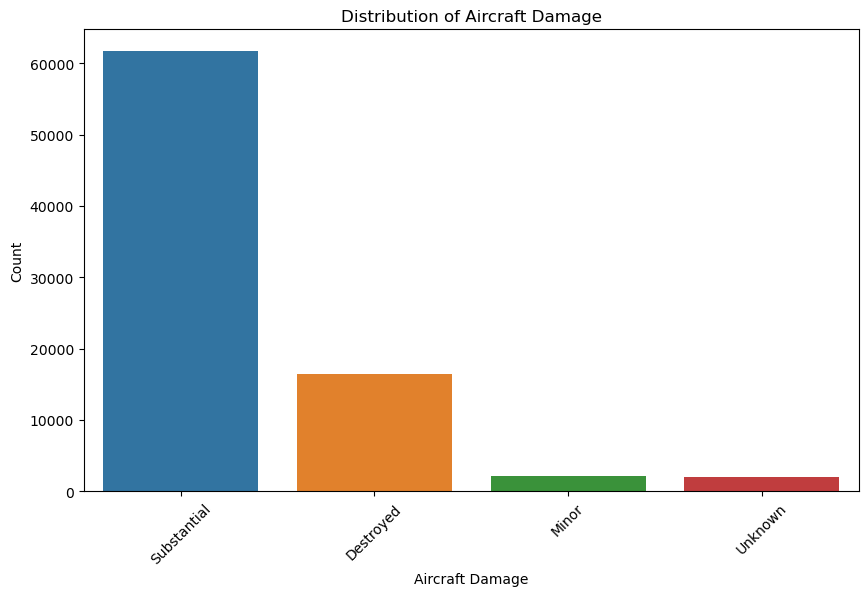

In [44]:
# Plot distribution of aircraft damage
fig, ax = plt.subplots(figsize=(10, 6))
order = df_USA['Aircraft.damage'].value_counts().index
sns.countplot(data=df_USA, x='Aircraft.damage', order=order, ax=ax)
ax.set_title('Distribution of Aircraft Damage')
ax.set_xlabel('Aircraft Damage')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### : Distribution of Aircraft Categories
Different categories of aircraft may have different risk profiles. Analyzing this can help in understanding which types of aircraft are more prone to accidents.

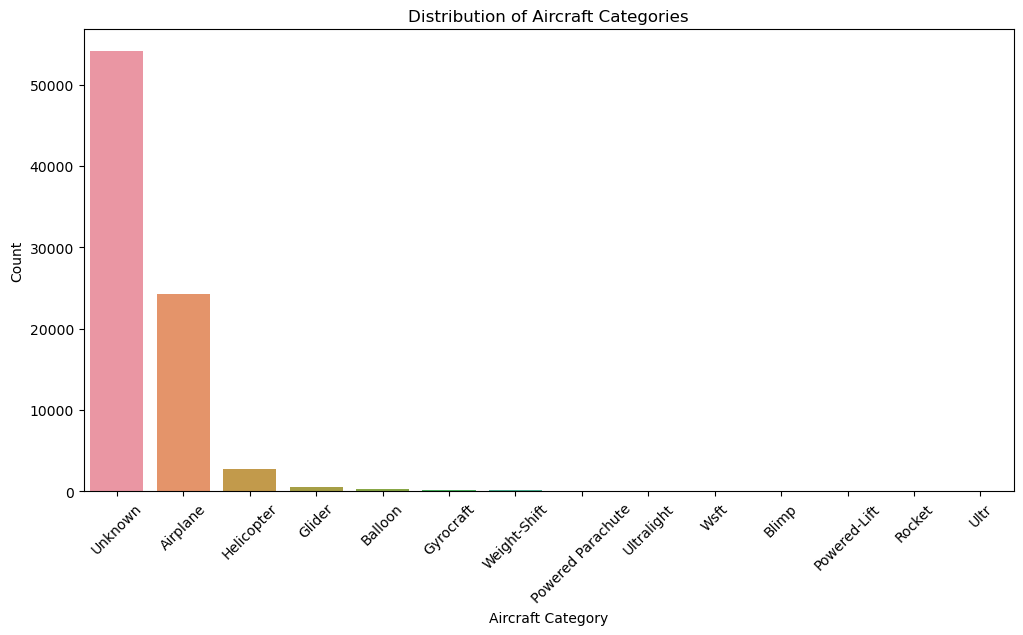

In [46]:
# Plot distribution of aircraft categories
fig, ax = plt.subplots(figsize=(12, 6))
order = df_USA['Aircraft.Category'].value_counts().index
sns.countplot(data=df_USA, x='Aircraft.Category', order=order, ax=ax)
ax.set_title('Distribution of Aircraft Categories')
ax.set_xlabel('Aircraft Category')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### : Distribution of Makes

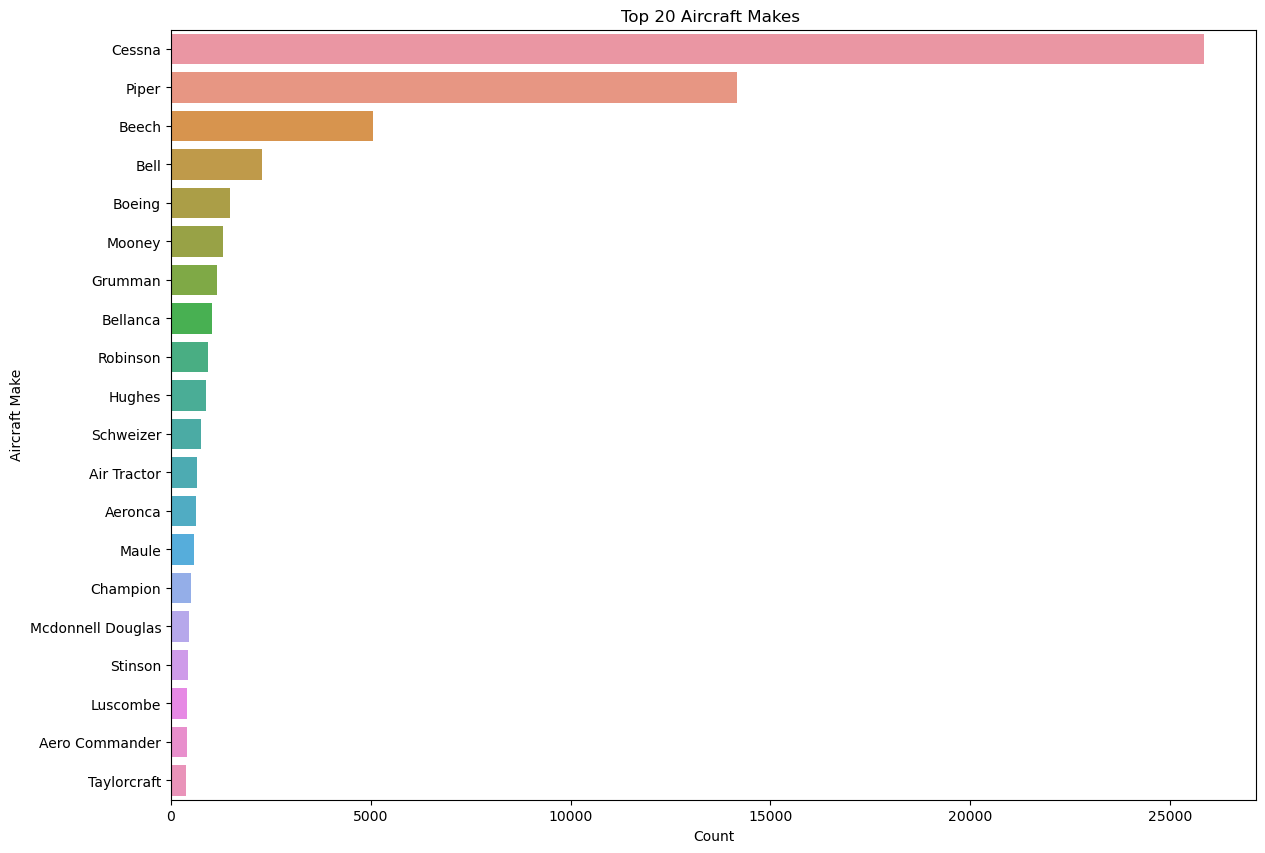

In [48]:
# Top 20 aircraft makes 
top_makes = df_USA['Make'].value_counts().nlargest(20).index

fig, ax = plt.subplots(figsize=(14, 10))
sns.countplot(data=df_USA[df_USA['Make'].isin(top_makes)], y='Make', order=top_makes, ax=ax)
ax.set_title('Top 20 Aircraft Makes ')
ax.set_xlabel('Count')
ax.set_ylabel('Aircraft Make')
plt.show()


### : Distribution of Weather Conditions
Weather conditions can significantly impact the likelihood of accidents. This analysis helps to identify the most hazardous weather conditions.

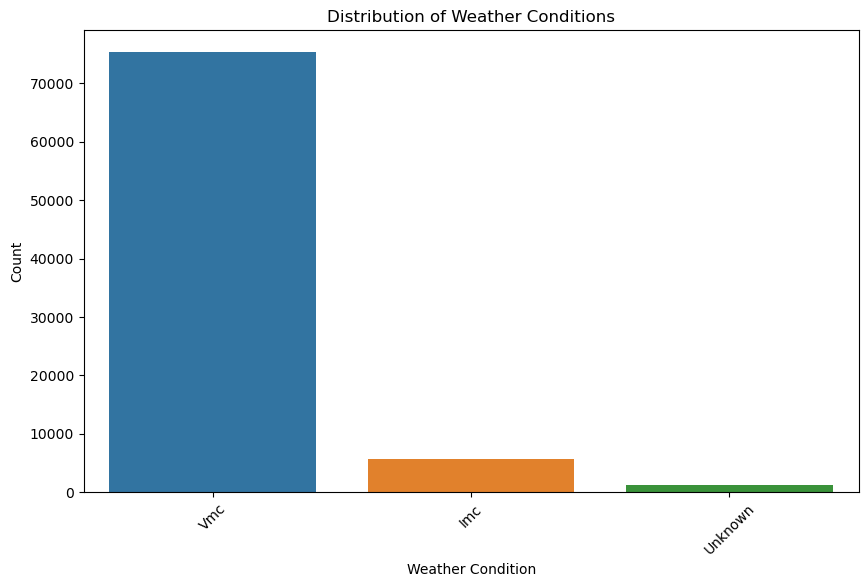

In [49]:
# Plot distribution of weather conditions
fig, ax = plt.subplots(figsize=(10, 6))
order = df_USA['Weather.Condition'].value_counts().index
sns.countplot(data=df_USA, x='Weather.Condition', order=order, ax=ax)
ax.set_title('Distribution of Weather Conditions')
ax.set_xlabel('Weather Condition')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### :Distribution of accidents by state

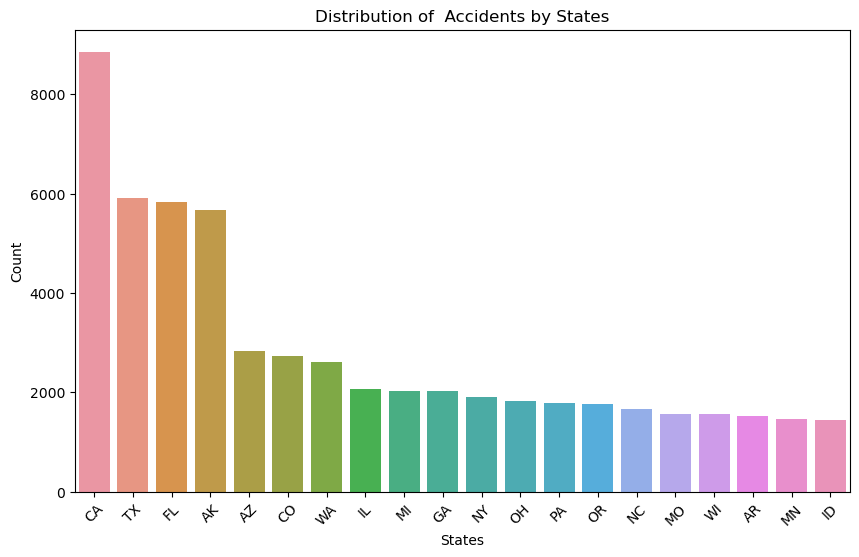

In [70]:
# Plot distribution of accidents by state
fig, ax = plt.subplots(figsize=(10, 6))
order = df_USA['State'].value_counts().head(20).index
sns.countplot(data=df_USA, x='State', order=order, ax=ax)
ax.set_title('Distribution of  Accidents by States')
ax.set_xlabel('States')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.show()

It seems most of Accidents happen in Carlifonia and the least accidents are in Virgin Islands

## 4.2 Bivariate Analysis

### : Aircraft Damage vs. Broad Phase of Flight

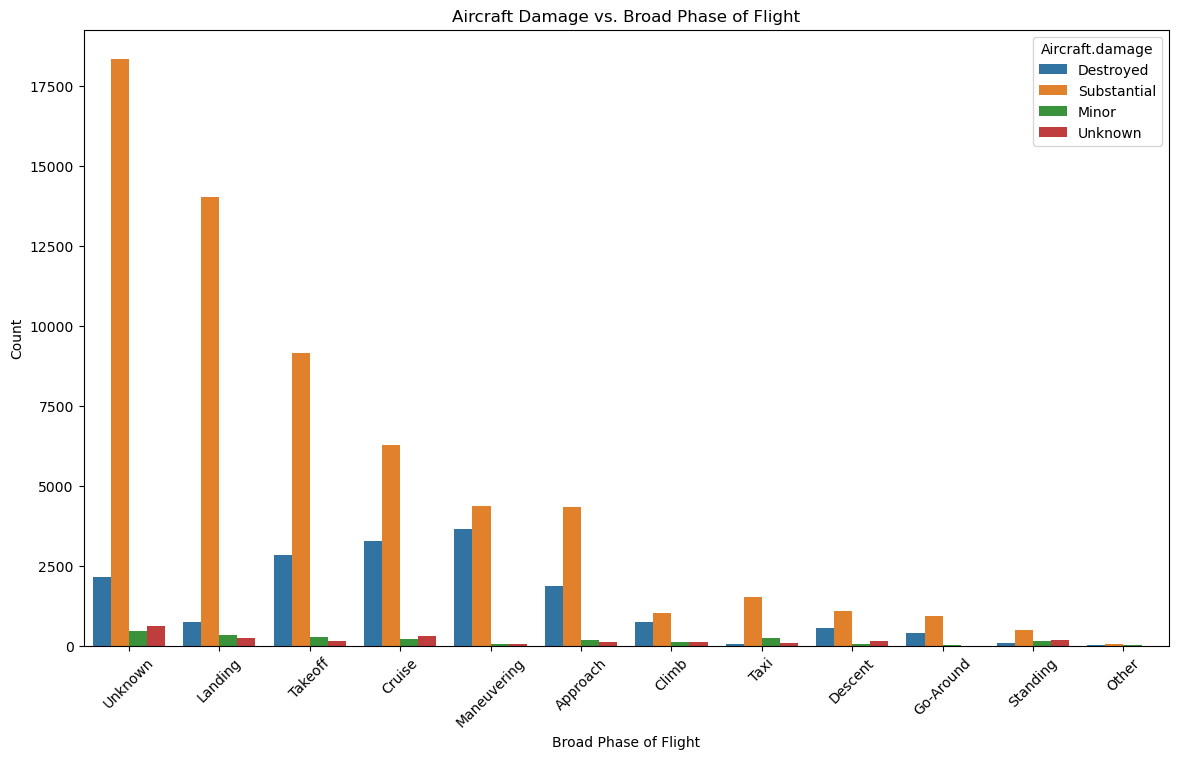

In [56]:
# Plot aircraft damage vs. broad phase of flight
fig, ax = plt.subplots(figsize=(14, 8))
order = df_USA['Broad.phase.of.flight'].value_counts().index
sns.countplot(data=df_USA, x='Broad.phase.of.flight', hue='Aircraft.damage', order=order, ax=ax)
ax.set_title('Aircraft Damage vs. Broad Phase of Flight')
ax.set_xlabel('Broad Phase of Flight')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.show()


1. Many Aviation accidents happen during landing and the damage level is substantial followed by takeoff.
2. If an accident happens during maneuvering phase, the aircraft is likely to be destroyed.

### :  Aircraft Damage vs. Weather Condition

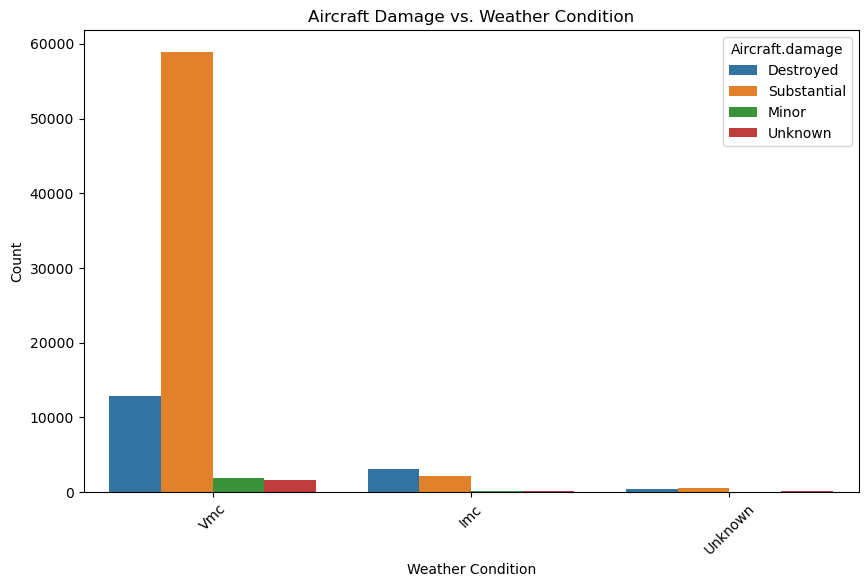

In [57]:
# Plot aircraft damage vs. weather condition
fig, ax = plt.subplots(figsize=(10, 6))
order = df_USA['Weather.Condition'].value_counts().index
sns.countplot(data=df_USA, x='Weather.Condition', hue='Aircraft.damage', order=order, ax=ax)
ax.set_title('Aircraft Damage vs. Weather Condition')
ax.set_xlabel('Weather Condition')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
plt.show()


1. Accidents occur during VMC weather conditions and when they do the damage is critical hence it's better to take flights during IMC weather conditions

### :Total Fatal Injuries vs. Aircraft Category

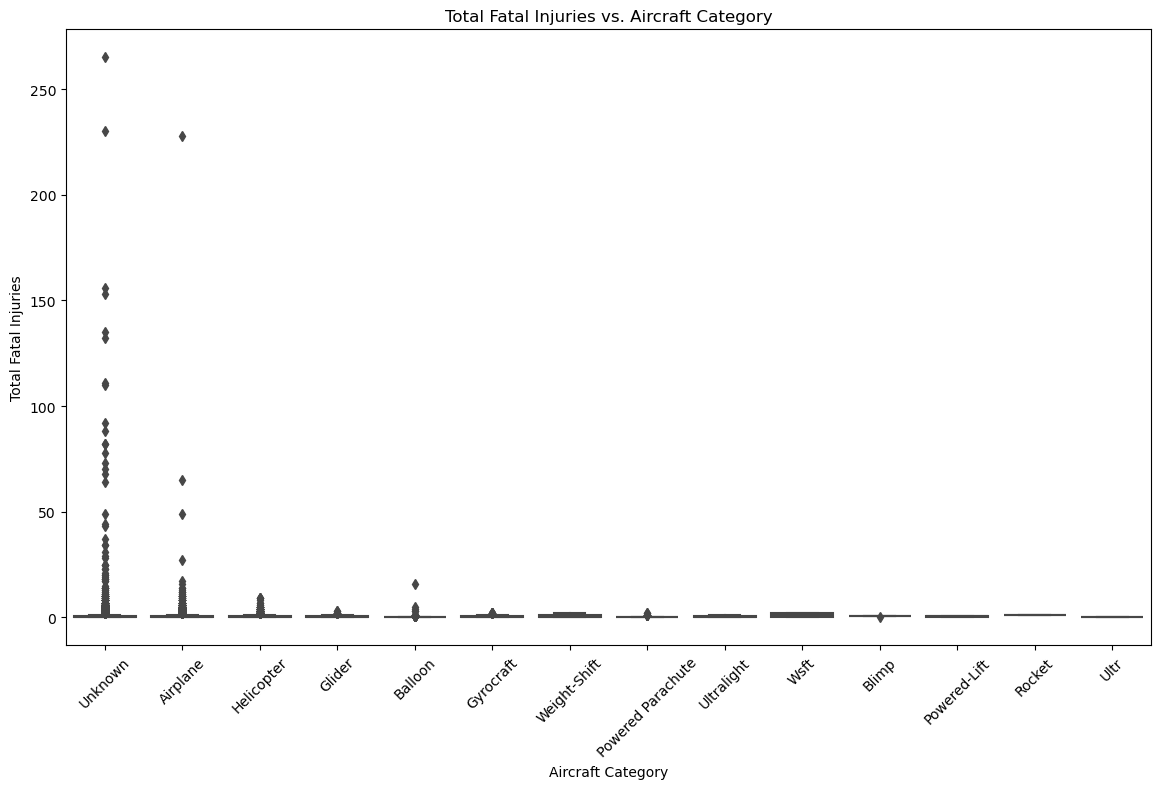

In [59]:
# Plot total fatal injuries vs. aircraft category
fig, ax = plt.subplots(figsize=(14, 8))
order = df_USA['Aircraft.Category'].value_counts().index
sns.boxplot(data=df_USA, x='Aircraft.Category', y='Total.Fatal.Injuries', order=order, ax=ax)
ax.set_title('Total Fatal Injuries vs. Aircraft Category')
ax.set_xlabel('Aircraft Category')
ax.set_ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)
plt.show()


Airplanes tend to have major fatal injuries

### :  Distribution of Aircraft Models Involved in Accidents

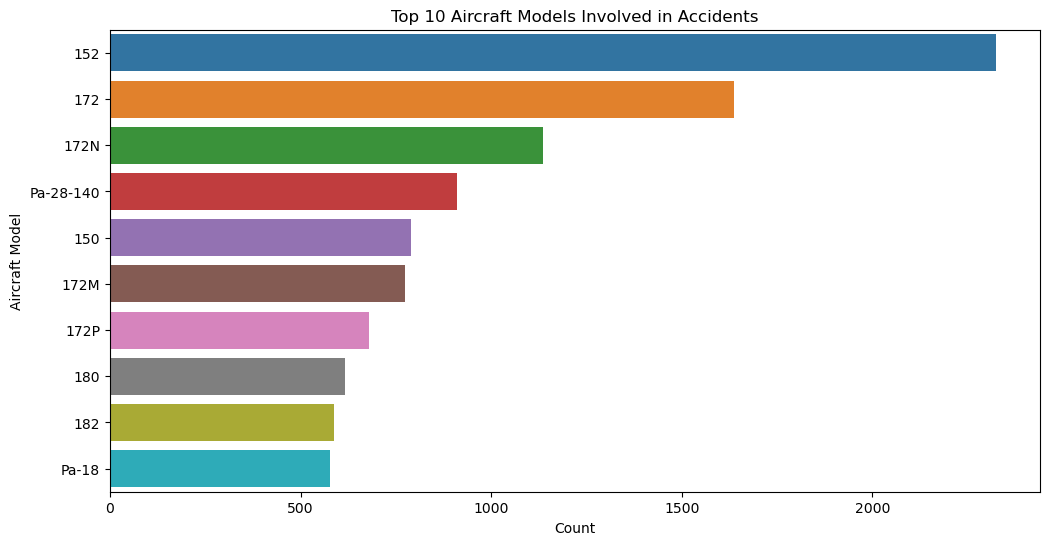

In [60]:
# Top 10 aircraft models involved in accidents
top_models = df_USA['Model'].value_counts().nlargest(10).index

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df_USA[df_USA['Model'].isin(top_models)], y='Model', order=top_models, ax=ax)
ax.set_title('Top 10 Aircraft Models Involved in Accidents')
ax.set_xlabel('Count')
ax.set_ylabel('Aircraft Model')
plt.show()


### . Trend of Accidents Over Time by Year

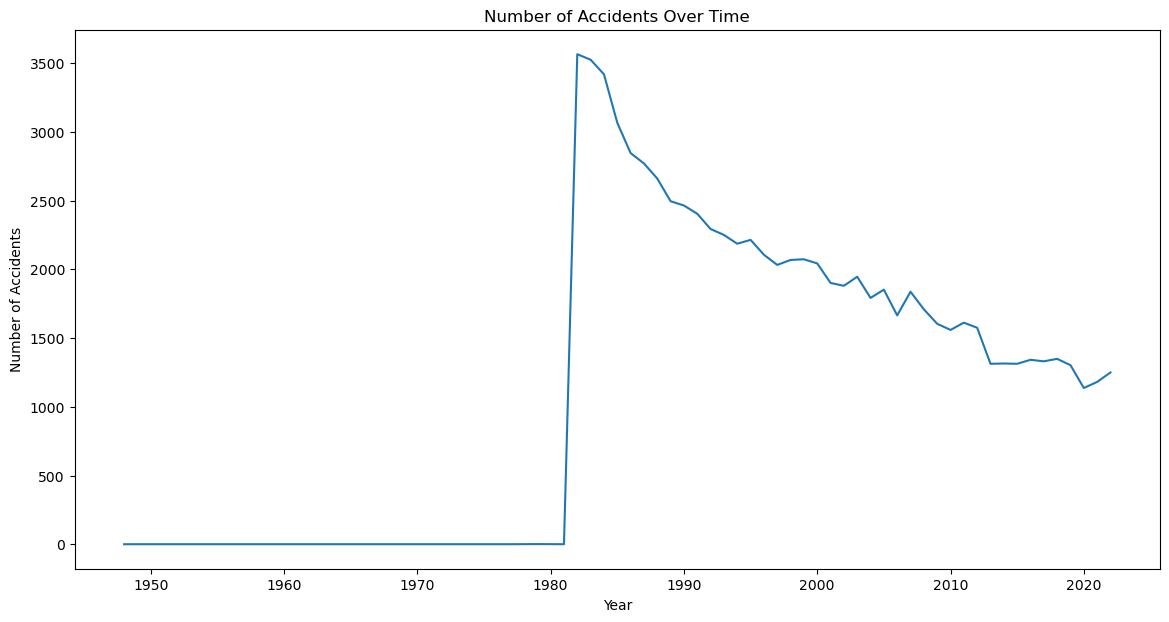

In [61]:
# Number of accidents per year
accidents_per_year = df_USA['Year'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(14, 7))
accidents_per_year.plot(kind='line', ax=ax)
ax.set_title('Number of Accidents Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Accidents')
plt.show()


## 4.3 MULTIVARIATE ANALYSIS

### :Injuries Distribution by Aircraft Category

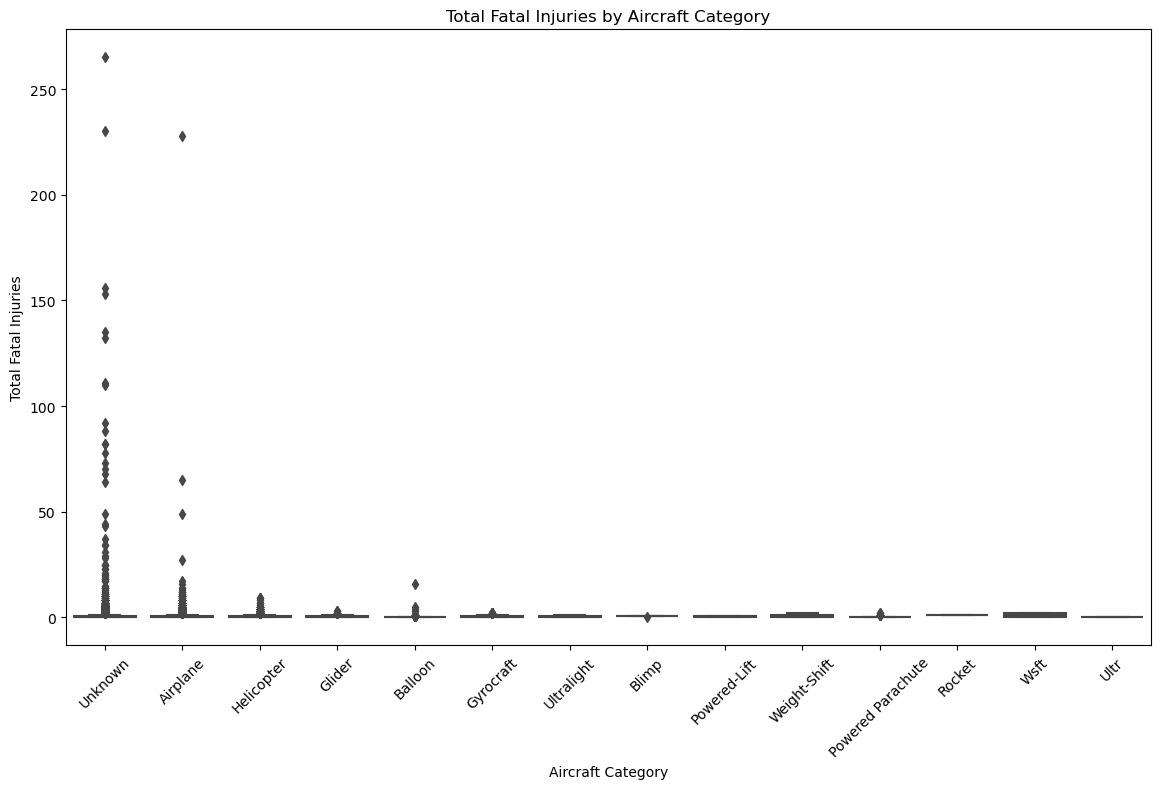

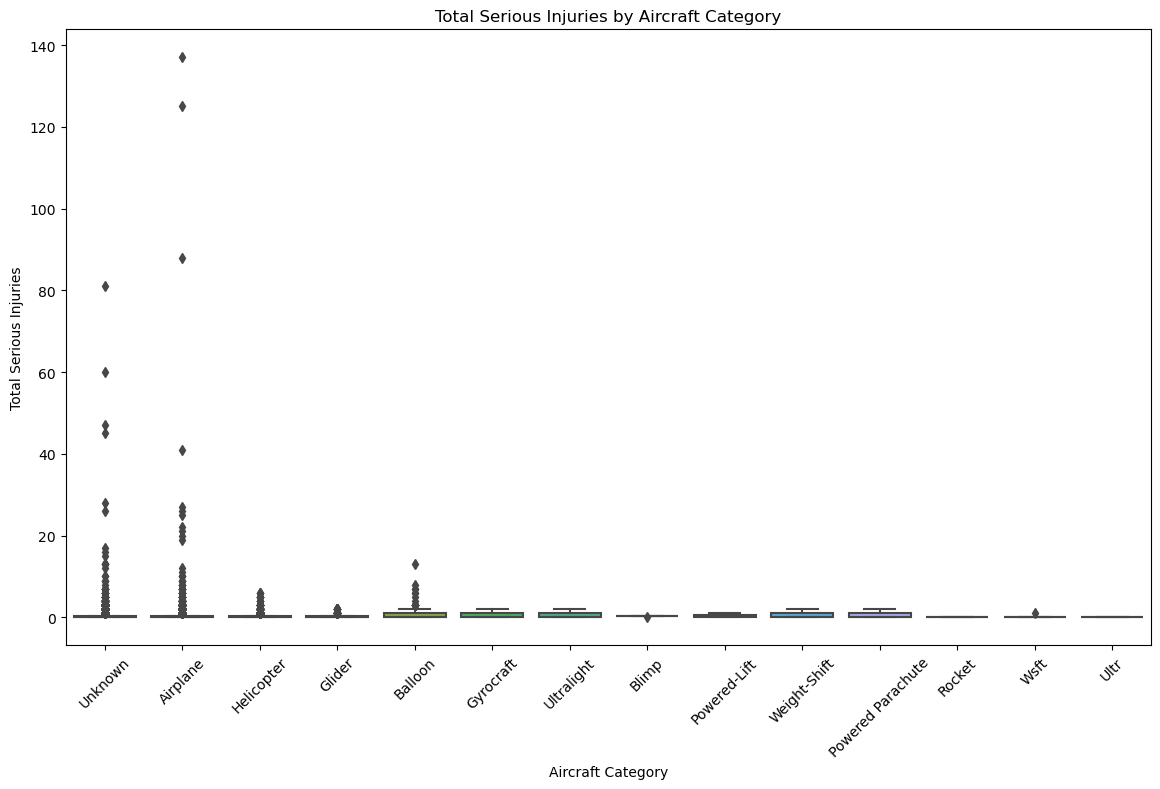

In [68]:
# Distribution of total injuries by aircraft category
fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(data=df_USA, x='Aircraft.Category', y='Total.Fatal.Injuries', ax=ax)
ax.set_title('Total Fatal Injuries by Aircraft Category')
ax.set_xlabel('Aircraft Category')
ax.set_ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)
plt.show()

fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(data=df_USA, x='Aircraft.Category', y='Total.Serious.Injuries', ax=ax)
ax.set_title('Total Serious Injuries by Aircraft Category')
ax.set_xlabel('Aircraft Category')
ax.set_ylabel('Total Serious Injuries')
plt.xticks(rotation=45)
plt.show()


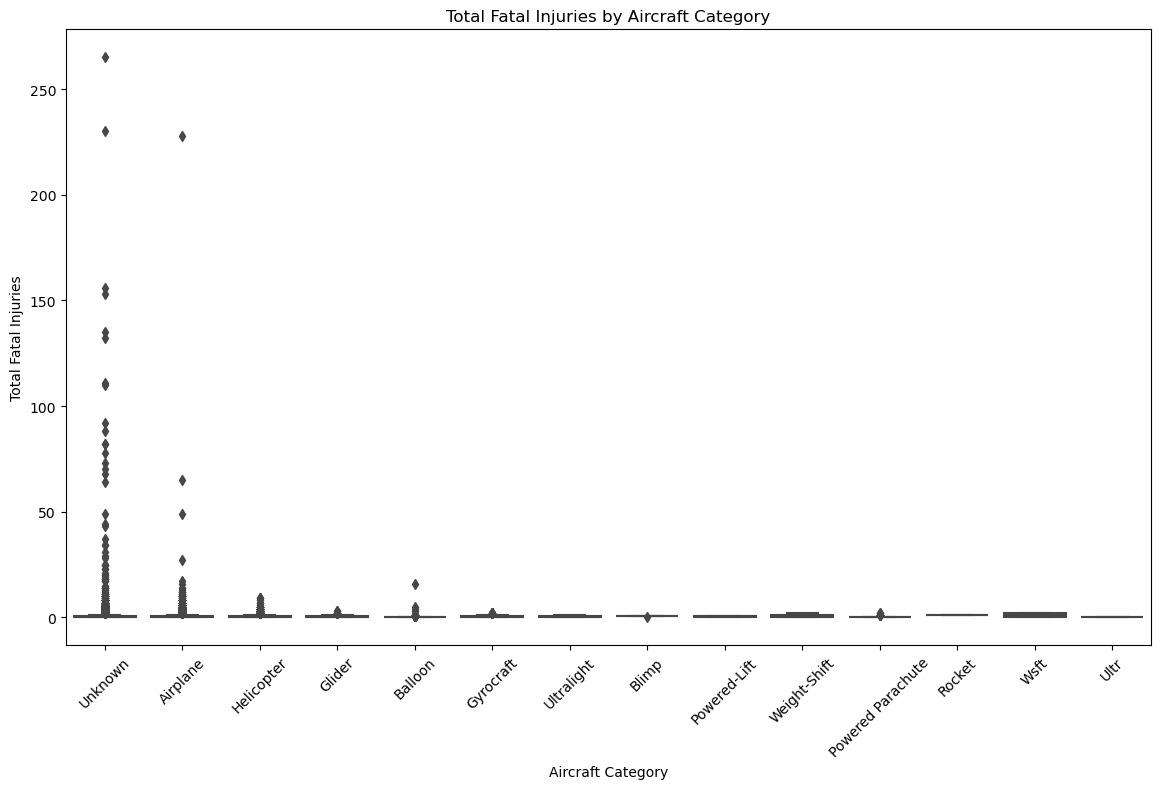

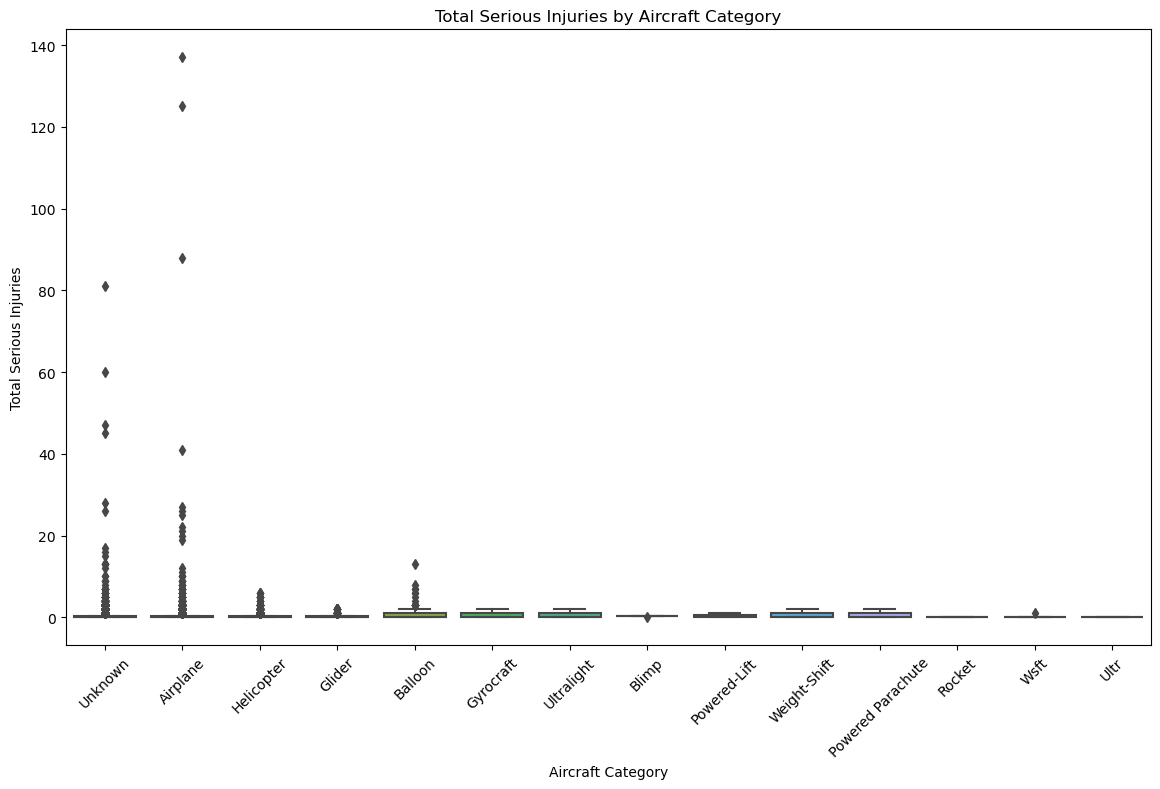

In [67]:
# Convert inf values to NaN and fill NaNs
injury_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
df_USA[injury_columns] = df_USA[injury_columns].replace([np.inf, -np.inf], np.nan)
df_USA[injury_columns] = df_USA[injury_columns].fillna(df_USA[injury_columns].mean())

# Distribution of total injuries by aircraft category
fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(data=df_USA, x='Aircraft.Category', y='Total.Fatal.Injuries', ax=ax)
ax.set_title('Total Fatal Injuries by Aircraft Category')
ax.set_xlabel('Aircraft Category')
ax.set_ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)
plt.show()

fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(data=df_USA, x='Aircraft.Category', y='Total.Serious.Injuries', ax=ax)
ax.set_title('Total Serious Injuries by Aircraft Category')
ax.set_xlabel('Aircraft Category')
ax.set_ylabel('Total Serious Injuries')
plt.xticks(rotation=45)
plt.show()
